In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.创建对象

`np.nan 是非数字`  
`这里通过传递一个list对象类创建一个Series，同时pandas默认创建整型索引`

In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [13]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

`显示Series的形状`

In [14]:
s.shape

(6,)

In [16]:
# 创建一个DataFrame 创建一个以时间序列为类型的索引对象
dates = pd.date_range('20130101', periods=6)
print(type(dates))
dates

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

`定义一个DataFrame 参数为：二维对象/日期索引/列名称`

In [20]:
lis = np.random.randn(6, 4)
print(lis)
print(type(lis))
df = pd.DataFrame(lis, index=dates, columns=list('ABCD'))

[[-0.03064071 -0.48634143  0.04501794 -1.3260063 ]
 [-0.97299222  0.27997097 -0.89156965  1.12844809]
 [ 0.80180183  0.23196925  0.27018955  0.92087587]
 [ 1.1518892  -1.43718646  0.21432007  0.35549949]
 [-0.09214883 -0.27686505 -0.37575536 -0.4452939 ]
 [ 1.71932363  0.98011946  0.4586644  -0.17475911]]
<class 'numpy.ndarray'>


In [19]:
# 定义DataFrame时，使用index给行索引赋值，columns给列索引赋值
df

,A,B,C,D
2013-01-01,0.128481,0.560223,-0.619091,0.630456
2013-01-02,-0.593963,-0.517941,-0.176410,0.827096
2013-01-03,1.594059,0.514401,1.269176,2.721205
2013-01-04,0.949491,0.750915,-0.192096,-0.620918
2013-01-05,0.855511,0.868556,1.831027,-1.445911
2013-01-06,-0.385136,-0.341458,-0.272479,0.664618


In [21]:
print('---Timestamp对象---')
b = pd.Timestamp('20130102')
print(b)
print(type(b))
print('-' * 20)
# this 1 -> [1, 1, 1, 1]
print('---Series对象 dtype指定类型---')
c = pd.Series(1, index=list(range(4)), dtype='float32')
print(c)
print(type(c))
print('-' * 20)
# [3]*4 -> [3, 3, 3, 3]
print('---ndarray类型---')
d = np.array([3]*4, dtype='int32')
print(d)
print(type(d))
print('-' * 20)
print('---Categorical类型---')
e = pd.Categorical(['test', 'train', 'test', 'train'])
print(e)
print(type(e))
print('-' * 20)

---Timestamp对象---
2013-01-02 00:00:00
<class 'pandas._libs.tslib.Timestamp'>
--------------------
---Series对象 dtype指定类型---
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32
<class 'pandas.core.series.Series'>
--------------------
---ndarray类型---
[3 3 3 3]
<class 'numpy.ndarray'>
--------------------
---Categorical类型---
[test, train, test, train]
Categories (2, object): [test, train]
<class 'pandas.core.categorical.Categorical'>
--------------------


In [22]:
# 给 DataFrame 列的值可以为 list，Timestamp，Series，ndarray，Categorical 类型
dic = {  # 字典key为列名称，value为列元素(内容)
    'A': 1.,   # 默认表示为一维矩阵
    'B': b,    # Timestamp可以表示为一维矩阵
    'C': c,    # 使用Series作为列元素
    'D': d,    # 使用ndarray作为列元素
    'E': e,    # Categorical序列作为列元素
    'F': 'foo' # 字符串默认表示为列元素
}
df2 = pd.DataFrame(dic)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [23]:
# 查看每一列的数据类型
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [24]:
df

,A,B,C,D
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006
2013-01-02,-0.972992,0.279971,-0.891570,1.128448
2013-01-03,0.801802,0.231969,0.270190,0.920876
2013-01-04,1.151889,-1.437186,0.214320,0.355499
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294
2013-01-06,1.719324,0.980119,0.458664,-0.174759


# 2.查看数据

In [26]:
# 查看头部指定几行数据（不填参数默认为5行）
df.head(2)

,A,B,C,D
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006
2013-01-02,-0.972992,0.279971,-0.891570,1.128448


In [28]:
# 查看尾部指定几行数据（不填参数默认为5行）
df.tail(3)

,A,B,C,D
2013-01-04,1.151889,-1.437186,0.214320,0.355499
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294
2013-01-06,1.719324,0.980119,0.458664,-0.174759


In [29]:
# 查看DataFrame索引对象，类型为 datetime64
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# 查看列信息
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
# 查看快速统计
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.429539,-0.118056,-0.046522,0.076461
std,0.977234,0.823152,0.500887,0.916497
min,-0.972992,-1.437186,-0.891570,-1.326006
25%,-0.076772,-0.433972,-0.270562,-0.377660
50%,0.385581,-0.022448,0.129669,0.090370
75%,1.064367,0.267971,0.256222,0.779532
max,1.719324,0.980119,0.458664,1.128448


In [33]:
# 转置
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.030641,-0.972992,0.801802,1.151889,-0.092149,1.719324
B,-0.486341,0.279971,0.231969,-1.437186,-0.276865,0.980119
C,0.045018,-0.891570,0.270190,0.214320,-0.375755,0.458664
D,-1.326006,1.128448,0.920876,0.355499,-0.445294,-0.174759


In [34]:
# 对轴进行排序 axis 影响列索引 ascending 影响行索引 正序倒序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.326006,0.045018,-0.486341,-0.030641
2013-01-02,1.128448,-0.891570,0.279971,-0.972992
2013-01-03,0.920876,0.270190,0.231969,0.801802
2013-01-04,0.355499,0.214320,-1.437186,1.151889
2013-01-05,-0.445294,-0.375755,-0.276865,-0.092149
2013-01-06,-0.174759,0.458664,0.980119,1.719324


In [35]:
# 按值进行排序
df.sort_values(by=['B'])

,A,B,C,D
2013-01-04,1.151889,-1.437186,0.214320,0.355499
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294
2013-01-03,0.801802,0.231969,0.270190,0.920876
2013-01-02,-0.972992,0.279971,-0.891570,1.128448
2013-01-06,1.719324,0.980119,0.458664,-0.174759


# 3.选择

In [37]:
# 选中单独的列
df['A']

2013-01-01   -0.030641
2013-01-02   -0.972992
2013-01-03    0.801802
2013-01-04    1.151889
2013-01-05   -0.092149
2013-01-06    1.719324
Freq: D, Name: A, dtype: float64

In [38]:
# 通过[]进行选择，会对行进行切片
df[0:3]

,A,B,C,D
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006
2013-01-02,-0.972992,0.279971,-0.891570,1.128448
2013-01-03,0.801802,0.231969,0.270190,0.920876


In [49]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.972992,0.279971,-0.89157,1.128448
2013-01-03,0.801802,0.231969,0.27019,0.920876
2013-01-04,1.151889,-1.437186,0.21432,0.355499


In [44]:
df

,A,B,C,D
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006
2013-01-02,-0.972992,0.279971,-0.891570,1.128448
2013-01-03,0.801802,0.231969,0.270190,0.920876
2013-01-04,1.151889,-1.437186,0.214320,0.355499
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294
2013-01-06,1.719324,0.980119,0.458664,-0.174759


In [61]:
# 获得日期第一行
df.loc[dates[0]]

A   -0.030641
B   -0.486341
C    0.045018
D   -1.326006
Name: 2013-01-01 00:00:00, dtype: float64

In [72]:
# loc通过标签进行选择
# 先选择所有行，再选择指定列
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.030641,-0.486341
2013-01-02,-0.972992,0.279971
2013-01-03,0.801802,0.231969
2013-01-04,1.151889,-1.437186
2013-01-05,-0.092149,-0.276865
2013-01-06,1.719324,0.980119


In [56]:
# 选择指定行和列的交叉区域
df.loc['20130102':'20130105', ['A','B']]

,A,B
2013-01-02,-0.972992,0.279971
2013-01-03,0.801802,0.231969
2013-01-04,1.151889,-1.437186
2013-01-05,-0.092149,-0.276865


In [59]:
# 选择指定列的指定行的数据 维度缩减
df.loc['20130102',['A','B']]

A   -0.972992
B    0.279971
Name: 2013-01-02 00:00:00, dtype: float64

In [63]:
# 获得一个标量
df.loc[dates[0], 'A']

-0.030640708579392422

In [65]:
# 快速访问一个标量
df.at[dates[0], 'A']

-0.030640708579392422

In [70]:
a = df.loc['20130102':'20130105', ['A','B']]
print("-->df.loc['20130102':'20130105', ['A','B']]")
print(type(a), "\n")

b = df.loc['20130102',['A','B']]
print("-->df.loc['20130102',['A','B']]")
print(type(b), "\n")

c = df.loc[dates[0], 'A']
print("-->df.loc[dates[0], 'A']")
print(type(c), "\n")

-->df.loc['20130102':'20130105', ['A','B']]
<class 'pandas.core.frame.DataFrame'> 

-->df.loc['20130102',['A','B']]
<class 'pandas.core.series.Series'> 

-->df.loc[dates[0], 'A']
<class 'numpy.float64'> 



In [73]:
# 选择一行
df.iloc[3]

A    1.151889
B   -1.437186
C    0.214320
D    0.355499
Name: 2013-01-04 00:00:00, dtype: float64

In [76]:
# 先选行，再选列 类似切片
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.151889,-1.437186
2013-01-05,-0.092149,-0.276865


In [78]:
# 通过一个二维数组切片
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.972992,-0.891570
2013-01-03,0.801802,0.270190
2013-01-05,-0.092149,-0.375755


In [79]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.972992,0.279971,-0.89157,1.128448
2013-01-03,0.801802,0.231969,0.27019,0.920876


In [80]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.486341,0.045018
2013-01-02,0.279971,-0.891570
2013-01-03,0.231969,0.270190
2013-01-04,-1.437186,0.214320
2013-01-05,-0.276865,-0.375755
2013-01-06,0.980119,0.458664


In [85]:
# 获取特定的值
df.iloc[1, 1]

0.27997097295632301

In [86]:
# 获取特定的值
df.iat[1, 2]

-0.89156964687635265

## 布尔索引

In [88]:
# 选择符合条件的行出来 这里是选择列A的值大于0的行
df[df.A>0]

,A,B,C,D
2013-01-03,0.801802,0.231969,0.270190,0.920876
2013-01-04,1.151889,-1.437186,0.214320,0.355499
2013-01-06,1.719324,0.980119,0.458664,-0.174759


In [92]:
newdf = df[df>0]
print(type(newdf))
print(newdf)

<class 'pandas.core.frame.DataFrame'>
                   A         B         C         D
2013-01-01       NaN       NaN  0.045018       NaN
2013-01-02       NaN  0.279971       NaN  1.128448
2013-01-03  0.801802  0.231969  0.270190  0.920876
2013-01-04  1.151889       NaN  0.214320  0.355499
2013-01-05       NaN       NaN       NaN       NaN
2013-01-06  1.719324  0.980119  0.458664       NaN


In [99]:
df3 = df.copy()
# 设置了一个新的列
df3['E'] = ['o','o','t','t','p','t']
df3

,A,B,C,D,E
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006,o
2013-01-02,-0.972992,0.279971,-0.891570,1.128448,o
2013-01-03,0.801802,0.231969,0.270190,0.920876,t
2013-01-04,1.151889,-1.437186,0.214320,0.355499,t
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294,p
2013-01-06,1.719324,0.980119,0.458664,-0.174759,t


In [100]:
# isin方法过滤 很好用
df3[df3['E'].isin(['t','f'])]

,A,B,C,D,E
2013-01-03,0.801802,0.231969,0.270190,0.920876,t
2013-01-04,1.151889,-1.437186,0.214320,0.355499,t
2013-01-06,1.719324,0.980119,0.458664,-0.174759,t


## 设置

In [101]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [104]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006,NaN
2013-01-02,-0.972992,0.279971,-0.891570,1.128448,1.0
2013-01-03,0.801802,0.231969,0.270190,0.920876,2.0
2013-01-04,1.151889,-1.437186,0.214320,0.355499,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294,4.0
2013-01-06,1.719324,0.980119,0.458664,-0.174759,5.0


In [106]:
# 通过标签设置新的值
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.486341,0.045018,-1.326006,NaN
2013-01-02,-0.972992,0.279971,-0.891570,1.128448,1.0
2013-01-03,0.801802,0.231969,0.270190,0.920876,2.0
2013-01-04,1.151889,-1.437186,0.214320,0.355499,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294,4.0
2013-01-06,1.719324,0.980119,0.458664,-0.174759,5.0


In [112]:
# 通过位置设置新的值
df.iat[0, 0] = 10
# 长度是指行数
print(len(df))
print(df)

6
                    A         B         C         D    F
2013-01-01  10.000000 -0.486341  0.045018 -1.326006  NaN
2013-01-02  -0.972992  0.279971 -0.891570  1.128448  1.0
2013-01-03   0.801802  0.231969  0.270190  0.920876  2.0
2013-01-04   1.151889 -1.437186  0.214320  0.355499  3.0
2013-01-05  -0.092149 -0.276865 -0.375755 -0.445294  4.0
2013-01-06   1.719324  0.980119  0.458664 -0.174759  5.0


In [115]:
# 设置一列的数据
df.loc[:, 'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2013-01-01,10.000000,-0.486341,0.045018,5,NaN
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0
2013-01-04,1.151889,-1.437186,0.214320,5,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,5,4.0
2013-01-06,1.719324,0.980119,0.458664,5,5.0


In [116]:
df3

,A,B,C,D,E
2013-01-01,-0.030641,-0.486341,0.045018,-1.326006,o
2013-01-02,-0.972992,0.279971,-0.891570,1.128448,o
2013-01-03,0.801802,0.231969,0.270190,0.920876,t
2013-01-04,1.151889,-1.437186,0.214320,0.355499,t
2013-01-05,-0.092149,-0.276865,-0.375755,-0.445294,p
2013-01-06,1.719324,0.980119,0.458664,-0.174759,t


In [121]:
df4 = df.copy()
# 大于0的部分都设置为负数
df4[df4>0] = -df4
df4

,A,B,C,D,F
2013-01-01,-10.000000,-0.486341,-0.045018,-5,NaN
2013-01-02,-0.972992,-0.279971,-0.891570,-5,-1.0
2013-01-03,-0.801802,-0.231969,-0.270190,-5,-2.0
2013-01-04,-1.151889,-1.437186,-0.214320,-5,-3.0
2013-01-05,-0.092149,-0.276865,-0.375755,-5,-4.0
2013-01-06,-1.719324,-0.980119,-0.458664,-5,-5.0


# 缺失值处理

In [122]:
df

,A,B,C,D,F
2013-01-01,10.000000,-0.486341,0.045018,5,NaN
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0
2013-01-04,1.151889,-1.437186,0.214320,5,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,5,4.0
2013-01-06,1.719324,0.980119,0.458664,5,5.0


In [125]:
#  reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,10.000000,-0.486341,0.045018,5,NaN,NaN
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0,NaN
2013-01-03,0.801802,0.231969,0.270190,5,2.0,NaN
2013-01-04,1.151889,-1.437186,0.214320,5,3.0,NaN


In [126]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,10.000000,-0.486341,0.045018,5,NaN,1.0
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0,NaN
2013-01-04,1.151889,-1.437186,0.214320,5,3.0,NaN


In [129]:
# 去掉包含缺失值的行
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.972992,0.279971,-0.89157,5,1.0,1.0


In [131]:
# 对缺失值进行填充
df1.fillna(value=100000)

,A,B,C,D,F,E
2013-01-01,10.000000,-0.486341,0.045018,5,100000.0,1.0
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0,100000.0
2013-01-04,1.151889,-1.437186,0.214320,5,3.0,100000.0


In [133]:
# 对数据进行布尔填充 nan都将变为True，其余的变为True
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 相关操作

In [134]:
df

,A,B,C,D,F
2013-01-01,10.000000,-0.486341,0.045018,5,NaN
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0
2013-01-04,1.151889,-1.437186,0.214320,5,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,5,4.0
2013-01-06,1.719324,0.980119,0.458664,5,5.0


In [136]:
# 平均值
df.mean()

A    2.101312
B   -0.118056
C   -0.046522
D    5.000000
F    3.000000
dtype: float64

In [139]:
# 在其他轴上进行相同的操作
df.mean(1)

2013-01-01    3.639669
2013-01-02    0.883082
2013-01-03    1.660792
2013-01-04    1.585805
2013-01-05    1.651046
2013-01-06    2.631621
Freq: D, dtype: float64

In [140]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [147]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates).shift(2)  # 向下偏移，空值补充nan
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64

In [152]:
df

,A,B,C,D,F
2013-01-01,10.000000,-0.486341,0.045018,5,NaN
2013-01-02,-0.972992,0.279971,-0.891570,5,1.0
2013-01-03,0.801802,0.231969,0.270190,5,2.0
2013-01-04,1.151889,-1.437186,0.214320,5,3.0
2013-01-05,-0.092149,-0.276865,-0.375755,5,4.0
2013-01-06,1.719324,0.980119,0.458664,5,5.0


In [154]:
df.sub(s, axis='index')  # df的每一列都整体去跟s相减

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.198198,-0.768031,-0.729810,4.0,1.0
2013-01-04,-1.848111,-4.437186,-2.785680,2.0,0.0
2013-01-05,-4.092149,-4.276865,-4.375755,1.0,0.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [156]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,10.000000,-0.486341,0.045018,5,NaN
2013-01-02,9.027008,-0.206370,-0.846552,10,1.0
2013-01-03,9.828810,0.025599,-0.576362,15,3.0
2013-01-04,10.980699,-1.411588,-0.362042,20,6.0
2013-01-05,10.888550,-1.688453,-0.737797,25,10.0
2013-01-06,12.607874,-0.708333,-0.279133,30,15.0


In [157]:
df.apply(lambda x: x.max()-x.min())

A    10.972992
B     2.417306
C     1.350234
D     0.000000
F     4.000000
dtype: float64

In [158]:
# 直方图
s = pd.Series(np.random.randint(0,7,size=10))
s

0    3
1    1
2    2
3    5
4    3
5    6
6    6
7    6
8    4
9    5
dtype: int64

In [159]:
s.value_counts()

6    3
5    2
3    2
4    1
2    1
1    1
dtype: int64

In [160]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [161]:
s.str.lower()  # upper len

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [162]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

# 6.合并
Pandas提供了大量的方法能够轻松的对Series，DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。

In [164]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.888990,-0.882167,0.294443,-0.661221
1,-0.800955,0.581737,-1.775647,-1.577302
2,1.399941,-0.019278,-1.264974,0.086712
3,-0.312036,0.919042,2.112403,-1.330721
4,-0.399272,0.622482,0.679134,0.441278
5,-0.540670,0.624904,-0.583593,-0.275068
6,-0.288586,0.298749,-0.472490,-0.537158
7,0.956054,-0.206017,0.712079,0.419134
8,0.282060,-0.538186,0.981178,-0.204894
9,0.038499,0.354016,1.934643,0.133261


In [167]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.888990 -0.882167  0.294443 -0.661221
 1 -0.800955  0.581737 -1.775647 -1.577302
 2  1.399941 -0.019278 -1.264974  0.086712,
           0         1         2         3
 3 -0.312036  0.919042  2.112403 -1.330721
 4 -0.399272  0.622482  0.679134  0.441278
 5 -0.540670  0.624904 -0.583593 -0.275068
 6 -0.288586  0.298749 -0.472490 -0.537158,
           0         1         2         3
 7  0.956054 -0.206017  0.712079  0.419134
 8  0.282060 -0.538186  0.981178 -0.204894
 9  0.038499  0.354016  1.934643  0.133261]

In [169]:
# 合并
pd.concat(pieces)

,0,1,2,3
0,0.888990,-0.882167,0.294443,-0.661221
1,-0.800955,0.581737,-1.775647,-1.577302
2,1.399941,-0.019278,-1.264974,0.086712
3,-0.312036,0.919042,2.112403,-1.330721
4,-0.399272,0.622482,0.679134,0.441278
5,-0.540670,0.624904,-0.583593,-0.275068
6,-0.288586,0.298749,-0.472490,-0.537158
7,0.956054,-0.206017,0.712079,0.419134
8,0.282060,-0.538186,0.981178,-0.204894
9,0.038499,0.354016,1.934643,0.133261


In [189]:
left = pd.DataFrame({'key': ['a','a'], 'lval': [1, 2]})
left

,key,lval
0,a,1
1,a,2


In [190]:
right = pd.DataFrame({'key': ['a','a'], 'lval': [4, 5]})
right

,key,lval
0,a,4
1,a,5


In [191]:
pd.merge(left, right, on="key")

,key,lval_x,lval_y
0,a,1,4
1,a,1,5
2,a,2,4
3,a,2,5


In [192]:
df5 = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [193]:
df5

,A,B,C,D
0,-0.210691,-2.301648,0.118644,-0.992739
1,-2.211251,-0.174315,-1.236718,1.205840
2,-1.990133,-0.228034,-0.236053,0.082409
3,0.374194,0.834089,-0.680568,-0.563332
4,0.793490,1.281398,0.210155,0.097974
5,-1.302011,0.108617,-1.010736,0.619627
6,-0.021759,0.753980,-0.745115,-0.577464
7,-0.029082,-0.346992,-0.666640,1.299019


In [196]:
s = df5.iloc[3]
s

A    0.374194
B    0.834089
C   -0.680568
D   -0.563332
Name: 3, dtype: float64

In [201]:
df5.append(s, ignore_index=True)  # ignore_index=False时会将这行之前的Name附带到DataFrame里面

,A,B,C,D
0,-0.210691,-2.301648,0.118644,-0.992739
1,-2.211251,-0.174315,-1.236718,1.205840
2,-1.990133,-0.228034,-0.236053,0.082409
3,0.374194,0.834089,-0.680568,-0.563332
4,0.793490,1.281398,0.210155,0.097974
5,-1.302011,0.108617,-1.010736,0.619627
6,-0.021759,0.753980,-0.745115,-0.577464
7,-0.029082,-0.346992,-0.666640,1.299019
8,0.374194,0.834089,-0.680568,-0.563332


# 7.分组
对于”group by”操作，我们通常是指以下一个或多个操作步骤：

- （Splitting）按照一些规则将数据分为不同的组；
- （Applying）对于每组数据分别执行一个函数；
- （Combining）将结果组合到一个数据结构中；

In [202]:
df = pd.DataFrame({
                   'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,0.525111,-0.339709
1,bar,one,0.503238,1.046024
2,foo,two,0.583732,-0.005186
3,bar,three,-1.035239,0.054197
4,foo,two,-1.193339,-0.220146
5,bar,two,0.941995,-1.178883
6,foo,one,1.886588,-1.630271
7,foo,three,1.121706,-1.575989


In [204]:
# 把A列的字段聚合
df.groupby('A').sum()

,C,D
A,,
bar,0.409994,-0.078662
foo,2.923798,-3.771301


In [205]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.503238  1.046024
    three -1.035239  0.054197
    two    0.941995 -1.178883
foo one    2.411699 -1.969980
    three  1.121706 -1.575989
    two   -0.609607 -0.225332

# 8.Reshaping

In [206]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
           ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [211]:
# 多行索引
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [210]:
# 两个行索引以及行索引的名称
df6 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df6

A         B
first second                    
bar   one     2.792136 -1.139140
      two     0.529019  0.322354
baz   one    -0.314201 -3.230947
      two    -1.245024 -1.024977
foo   one    -0.610808 -0.104575
      two    -0.982754  0.321927
qux   one     0.325285  1.123528
      two     0.181062 -0.067325

In [214]:
stacked = df6.stack()
stacked

first  second   
bar    one     A    2.792136
               B   -1.139140
       two     A    0.529019
               B    0.322354
baz    one     A   -0.314201
               B   -3.230947
       two     A   -1.245024
               B   -1.024977
foo    one     A   -0.610808
               B   -0.104575
       two     A   -0.982754
               B    0.321927
qux    one     A    0.325285
               B    1.123528
       two     A    0.181062
               B   -0.067325
dtype: float64

In [219]:
# 多个行索引的Series
print(type(stacked))
print(stacked.shape)
print(stacked.dtypes)

<class 'pandas.core.series.Series'>
(16,)
float64


In [221]:
# 多个行索引的Series解压为DataFrame
stacked.unstack()

A         B
first second                    
bar   one     2.792136 -1.139140
      two     0.529019  0.322354
baz   one    -0.314201 -3.230947
      two    -1.245024 -1.024977
foo   one    -0.610808 -0.104575
      two    -0.982754  0.321927
qux   one     0.325285  1.123528
      two     0.181062 -0.067325

In [229]:
dfstack = stacked.unstack(1)
dfstack

second        one       two
first                      
bar   A  2.792136  0.529019
      B -1.139140  0.322354
baz   A -0.314201 -1.245024
      B -3.230947 -1.024977
foo   A -0.610808 -0.982754
      B -0.104575  0.321927
qux   A  0.325285  0.181062
      B  1.123528 -0.067325

In [230]:
# 在不同的方向解包
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  2.792136 -0.314201 -0.610808  0.325285
       B -1.139140 -3.230947 -0.104575  1.123528
two    A  0.529019 -1.245024 -0.982754  0.181062
       B  0.322354 -1.024977  0.321927 -0.067325

In [238]:
import datetime
dfpivot = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                  'B': ['x', 'y', 'z'] * 8,
                  'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                  'D': np.random.randn(24),
                  'E': np.random.randn(24),
                  'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)] +
                     [datetime.datetime(2013, i, 15) for i in range(1, 13)]})
dfpivot

,A,B,C,D,E,F
0,one,x,foo,-0.109495,1.857485,2013-01-01
1,one,y,foo,1.884986,-0.056270,2013-02-01
2,two,z,foo,-2.327598,1.600925,2013-03-01
3,three,x,bar,-1.462311,-0.028318,2013-04-01
4,one,y,bar,-1.059092,-1.348700,2013-05-01
5,one,z,bar,-1.109855,0.649700,2013-06-01
6,two,x,foo,0.146656,0.028898,2013-07-01
7,three,y,foo,0.565139,0.747265,2013-08-01
8,one,z,foo,2.020345,-0.441670,2013-09-01
9,one,x,bar,1.411962,2.062692,2013-10-01


In [240]:
# 数据透视图
pd.pivot_table(dfpivot, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   x  0.099513 -0.001057
      y -0.930587  1.513152
      z -1.216695  0.115285
three x -0.958803       NaN
      y       NaN  0.763650
      z -0.382001       NaN
two   x       NaN  0.534187
      y  0.251066       NaN
      z       NaN -0.980408

In [250]:
rng = pd.date_range('1/1/2012', periods=120, freq='S')  # 生成时间索引序列，以每秒为单位，共100个时间点

In [251]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    387
2012-01-01 00:00:01    322
2012-01-01 00:00:02    326
2012-01-01 00:00:03    322
2012-01-01 00:00:04    201
2012-01-01 00:00:05    294
2012-01-01 00:00:06     62
2012-01-01 00:00:07     89
2012-01-01 00:00:08    331
2012-01-01 00:00:09    200
2012-01-01 00:00:10    295
2012-01-01 00:00:11    161
2012-01-01 00:00:12    161
2012-01-01 00:00:13     13
2012-01-01 00:00:14    415
2012-01-01 00:00:15    424
2012-01-01 00:00:16    466
2012-01-01 00:00:17    483
2012-01-01 00:00:18    142
2012-01-01 00:00:19    306
2012-01-01 00:00:20    390
2012-01-01 00:00:21    270
2012-01-01 00:00:22    281
2012-01-01 00:00:23    282
2012-01-01 00:00:24    301
2012-01-01 00:00:25    210
2012-01-01 00:00:26    225
2012-01-01 00:00:27    249
2012-01-01 00:00:28    388
2012-01-01 00:00:29    181
                      ... 
2012-01-01 00:01:30    127
2012-01-01 00:01:31    313
2012-01-01 00:01:32    369
2012-01-01 00:01:33    396
2012-01-01 00:01:34    101
2012-01-01 00:01:35    380
2

In [254]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    16373
2012-01-01 00:01:00    14918
Freq: T, dtype: int64

In [255]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [256]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    0.018959
2012-03-07   -1.897525
2012-03-08   -1.131079
2012-03-09   -0.095893
2012-03-10    0.731720
Freq: D, dtype: float64

In [257]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.018959
2012-03-07 00:00:00+00:00   -1.897525
2012-03-08 00:00:00+00:00   -1.131079
2012-03-09 00:00:00+00:00   -0.095893
2012-03-10 00:00:00+00:00    0.731720
Freq: D, dtype: float64

In [260]:
ts_utc.tz_convert('Asia/Shanghai')

2012-03-06 08:00:00+08:00    0.018959
2012-03-07 08:00:00+08:00   -1.897525
2012-03-08 08:00:00+08:00   -1.131079
2012-03-09 08:00:00+08:00   -0.095893
2012-03-10 08:00:00+08:00    0.731720
Freq: D, dtype: float64

In [264]:
rng = pd.date_range('1/10/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [265]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.433279
2012-02-29    0.198843
2012-03-31    2.329300
2012-04-30   -0.214334
2012-05-31   -0.404805
Freq: M, dtype: float64

In [266]:
ps = ts.to_period()
ps

2012-01    0.433279
2012-02    0.198843
2012-03    2.329300
2012-04   -0.214334
2012-05   -0.404805
Freq: M, dtype: float64

In [267]:
ps.to_timestamp()

2012-01-01    0.433279
2012-02-01    0.198843
2012-03-01    2.329300
2012-04-01   -0.214334
2012-05-01   -0.404805
Freq: MS, dtype: float64

In [268]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [269]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.905804
1990Q2    0.591112
1990Q3   -1.528968
1990Q4   -0.142490
1991Q1   -0.522659
1991Q2    0.697689
1991Q3    0.993225
1991Q4    1.319663
1992Q1   -1.018536
1992Q2   -0.186732
1992Q3    0.568239
1992Q4   -0.565195
1993Q1   -0.209746
1993Q2   -1.366113
1993Q3   -0.444598
1993Q4   -0.132961
1994Q1   -0.470678
1994Q2    0.087941
1994Q3   -1.773335
1994Q4    0.813086
1995Q1    2.239539
1995Q2   -0.421306
1995Q3    0.381529
1995Q4   -0.035132
1996Q1   -0.021281
1996Q2   -0.662257
1996Q3   -0.262912
1996Q4    1.697315
1997Q1   -0.345781
1997Q2    0.156068
1997Q3    3.513497
1997Q4   -1.161114
1998Q1    0.732810
1998Q2   -1.862603
1998Q3    0.114971
1998Q4   -1.049375
1999Q1    2.479662
1999Q2   -0.817222
1999Q3    1.389996
1999Q4   -0.832205
2000Q1   -0.577317
2000Q2    0.872608
2000Q3    1.679093
2000Q4   -0.247581
Freq: Q-NOV, dtype: float64

In [273]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00   -0.905804
1990-06-01 09:00    0.591112
1990-09-01 09:00   -1.528968
1990-12-01 09:00   -0.142490
1991-03-01 09:00   -0.522659
1991-06-01 09:00    0.697689
1991-09-01 09:00    0.993225
1991-12-01 09:00    1.319663
1992-03-01 09:00   -1.018536
1992-06-01 09:00   -0.186732
1992-09-01 09:00    0.568239
1992-12-01 09:00   -0.565195
1993-03-01 09:00   -0.209746
1993-06-01 09:00   -1.366113
1993-09-01 09:00   -0.444598
1993-12-01 09:00   -0.132961
1994-03-01 09:00   -0.470678
1994-06-01 09:00    0.087941
1994-09-01 09:00   -1.773335
1994-12-01 09:00    0.813086
1995-03-01 09:00    2.239539
1995-06-01 09:00   -0.421306
1995-09-01 09:00    0.381529
1995-12-01 09:00   -0.035132
1996-03-01 09:00   -0.021281
1996-06-01 09:00   -0.662257
1996-09-01 09:00   -0.262912
1996-12-01 09:00    1.697315
1997-03-01 09:00   -0.345781
1997-06-01 09:00    0.156068
1997-09-01 09:00    3.513497
1997-12-01 09:00   -1.161114
1998-03-01 09:00    0.732810
1998-06-01 09:00   -1.862603
1998-09-01 09:

   # 10.Categorical

In [293]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ['a', 'f', 'g', 'g', 'f', 'a']})
df

,id,raw_grade
0,1,a
1,2,f
2,3,g
3,4,g
4,5,f
5,6,a


In [294]:
df['raw_grade']

0    a
1    f
2    g
3    g
4    f
5    a
Name: raw_grade, dtype: object

In [303]:
# raw_grade列的object类型转为category类型
df['grade'] = df['raw_grade'].astype("category")
df['grade']

0    a
1    f
2    g
3    g
4    f
5    a
Name: grade, dtype: category
Categories (3, object): [a, f, g]

In [304]:
df

,id,raw_grade,grade
0,1,a,a
1,2,f,f
2,3,g,g
3,4,g,g
4,5,f,f
5,6,a,a


In [305]:
# 显示grade categories的详细信息
a = df["grade"].cat.categories
print(a)
print(type(a))

Index(['a', 'f', 'g'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [306]:
# grade categories的详细信息 赋值 ['a', 'f', 'g'] -> [very good, good, very bad]
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2     very bad
3     very bad
4         good
5    very good
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [307]:
df["grade"].cat.categories

Index(['very good', 'good', 'very bad'], dtype='object')

In [310]:
# 增加两个类别（补缺）
df["grade"] = df["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])
df["grade"].cat.categories

Index(['very bad', 'bad', 'medium', 'good', 'very good'], dtype='object')

In [311]:
df["grade"]

0    very good
1         good
2     very bad
3     very bad
4         good
5    very good
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [314]:
# 按照类别排序 可以根据抽象的好坏来排序
df.sort_values("grade")

,id,raw_grade,grade
2,3,g,very bad
3,4,g,very bad
1,2,f,good
4,5,f,good
0,1,a,very good
5,6,a,very good


In [316]:
# 存在空的类别会显示0
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

In [357]:
# 使用Series作图，Series的索引是时间类型
ts = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))
ts

2000-01-01    0.318298
2000-01-02   -1.925661
2000-01-03   -0.680426
2000-01-04   -0.042053
2000-01-05   -0.115740
2000-01-06    1.955743
2000-01-07   -0.563548
2000-01-08    1.012373
2000-01-09   -0.795741
2000-01-10   -0.346415
Freq: D, dtype: float64

In [358]:
# 累加
sts = ts.cumsum()
sts

2000-01-01    0.318298
2000-01-02   -1.607363
2000-01-03   -2.287788
2000-01-04   -2.329842
2000-01-05   -2.445582
2000-01-06   -0.489839
2000-01-07   -1.053387
2000-01-08   -0.041013
2000-01-09   -0.836754
2000-01-10   -1.183169
Freq: D, dtype: float64

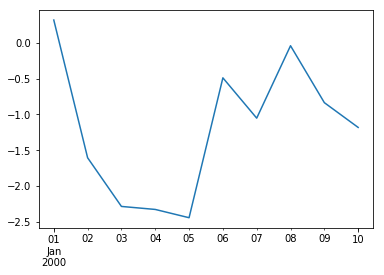

In [359]:
import matplotlib.pyplot as plt
sts.plot()
plt.show()

In [360]:
df = pd.DataFrame(np.random.randn(10, 4), index=pd.date_range('20120101',periods=10), columns=['A','B','C','D'])
df

,A,B,C,D
2012-01-01,1.154439,-0.567168,0.442858,-0.501636
2012-01-02,0.056415,-1.608857,1.989818,-0.570331
2012-01-03,-0.211476,1.218557,-1.229636,1.052984
2012-01-04,0.399349,-1.180275,-0.306371,-0.193046
2012-01-05,-0.757250,0.343156,0.226493,0.078601
2012-01-06,-0.220756,-0.414071,0.311513,-0.482000
2012-01-07,-0.478244,1.252946,-0.302569,-0.515724
2012-01-08,-1.081638,1.164641,-0.120784,-0.900429
2012-01-09,2.406609,0.395876,-0.509399,-0.429489
2012-01-10,-0.613539,1.663004,-0.765109,-0.605029


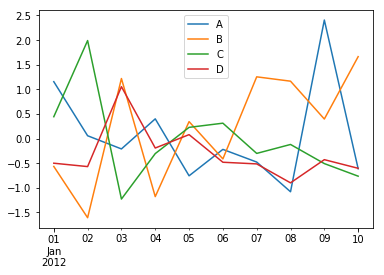

In [361]:
# 使用DataFrame作图，DataFrame的索引是时间类型
plt.figure()
df.plot()
plt.legend(loc="best")
plt.show()

In [396]:
# df.to_csv('xxx')  写入csv文件
# pd.read_hdf('foo.h5', 'df')  从HDF5中读取
# pd.to_excel('foo.xlsx', sheet_name=''Sheet)  写入Excel文件
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])  从Excel读
df = pd.read_csv("/home/nick/Desktop/DA/speedFile/count.csv", index_col=None, names=["total"], 
                 parse_dates=True, dtype={"total": np.int64}, encoding="utf-8")
increment = df['total'].diff()

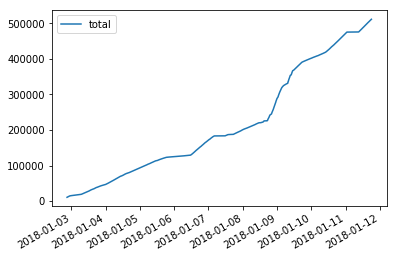

In [397]:
# 按照原始数据显示
df.plot()
plt.show()

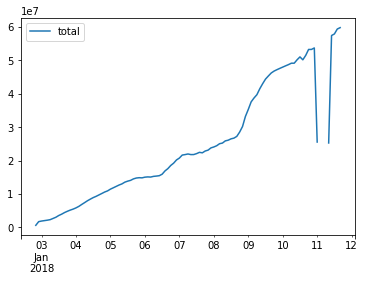

In [398]:
# 降低采样频率
a = df.loc[:"2018-01-11 18:00:00"]
a = a.resample('120Min').sum()
a.plot()
plt.show()

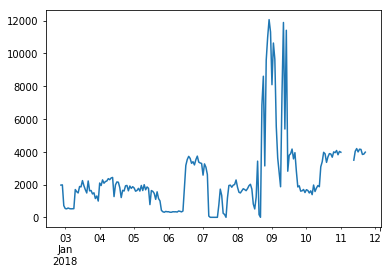

In [408]:
# 降低采样频率
s = pd.Series(increment, index=df.index)
sa = s.loc[:"2018-01-11 18:00:00"]
sa = sa.resample('1H').sum()
sa.plot()
plt.show()